In [3]:
import pandas as pd 
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import os

notebook_dir = os.getcwd()

# Build full path safely
file_path = os.path.join(notebook_dir, "data", "Housing_price_data.csv")

# Read CSV
df = pd.read_csv(file_path)

print("✅ Raw data loaded successfully!")
print(df.head(), "\n")

# 2️⃣ Basic info
print("🔹 Shape:", df.shape)
print("🔹 Missing values:\n", df.isna().sum())

#hanldels missing value
df = df.dropna(subset=["price", "area"])
df["furnishingstatus"] = df["furnishingstatus"].fillna("unknown")

#standardize data types
df["price"] = df["price"].astype(float)
df["area"] = df["area"].astype(float)

✅ Raw data loaded successfully!
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished   

🔹 Shape: (545, 13)
🔹 Missing values:
 price               0
area 

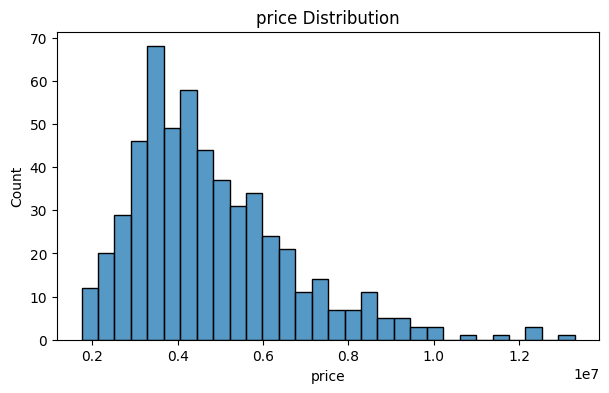

In [11]:
#featuring engineering
df["price_per_sqft"] = df["price"] / df["area"]
df["bhk_category"] = df["bedrooms"].apply(lambda x:f"{x} BHK")

#Exploratory Data analysis 
plt.figure(figsize=(7,4))
sns.histplot(df["price"], bins=30)
plt.title("price Distribution")
plt.show()

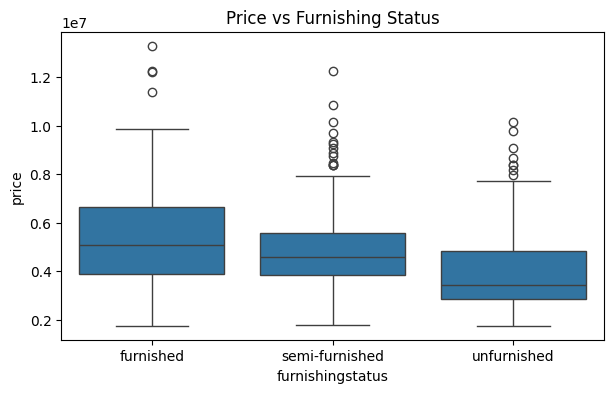

In [10]:
plt.figure(figsize=(7,4))
sns.boxplot(x="furnishingstatus", y="price", data=df)
plt.title("Price vs Furnishing Status")
plt.show()

In [15]:
#Save cleaned File
cleaned_path = os.path.join("data", "Housing_cleaned.csv")
df.to_csv(cleaned_path, index=False)
print("Cleaned data set saved:", cleaned_path)

Cleaned data set saved: data\Housing_cleaned.csv


In [4]:
#load to SQL
db_path = "housing_data.db"
engine = create_engine(f"sqlite:///{db_path}")

In [5]:
#push data
df.to_sql("housing_data_cleaned", con=engine, if_exists="replace", index=False)
print(f"Data loaded into SQL database: {db_path}")

Data loaded into SQL database: housing_data.db
